In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow_datasets as tfds
import keras
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.applications import xception
from tensorflow.keras.applications.xception import Xception

In [4]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [5]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.5 MB/s eta 0:00:00


In [6]:
from keras_preprocessing.image.utils import img_to_array
from keras.utils import load_img

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import tensorflow_datasets as tfds

In [9]:
pwd

'/content'

**Data folder  structure**

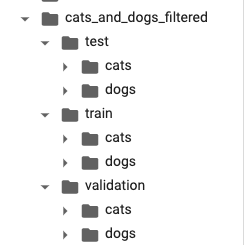

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/cats_and_dogs_filtered/train",
  seed=123,
  image_size=(250, 250),
  batch_size=1)

Found 2000 files belonging to 2 classes.


In [11]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/cats_and_dogs_filtered/test",
  seed=123,
  image_size=(250, 250),
  batch_size=1)

Found 1000 files belonging to 2 classes.


In [13]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/drive/MyDrive/cats_and_dogs_filtered/validation",
  seed=123,
  image_size=(250, 250),
  batch_size=1)

Found 1000 files belonging to 2 classes.


In [14]:
for i,l in train_ds.take(1):
    print(i.numpy().reshape(250, 250, 3))

[[[114.       100.        91.      ]
  [114.       100.        91.      ]
  [114.       100.        91.      ]
  ...
  [107.01001   88.01001   82.01001 ]
  [105.731964  87.49098   80.60546 ]
  [102.121475  84.87047   76.99597 ]]

 [[114.       100.        91.      ]
  [114.       100.        91.      ]
  [114.       100.        91.      ]
  ...
  [109.6275    90.6275    84.6275  ]
  [104.20491   85.20491   78.6989  ]
  [ 99.1245    80.37047   71.37248 ]]

 [[115.       101.        92.      ]
  [115.       101.        92.      ]
  [115.       101.        92.      ]
  ...
  [109.214966  89.964966  83.714966]
  [102.72896   82.34945   74.46393 ]
  [101.62752   79.49698   71.24899 ]]

 ...

 [[ 98.1245    77.1245    60.1245  ]
  [ 99.        78.        61.      ]
  [ 98.51      77.51      60.51    ]
  ...
  [ 83.48999   89.98999   98.98999 ]
  [ 84.283066  93.17159  104.05411 ]
  [ 86.25101   98.25101  111.75101 ]]

 [[ 97.248     76.248     59.248   ]
  [ 98.494     77.494     60.494   ]


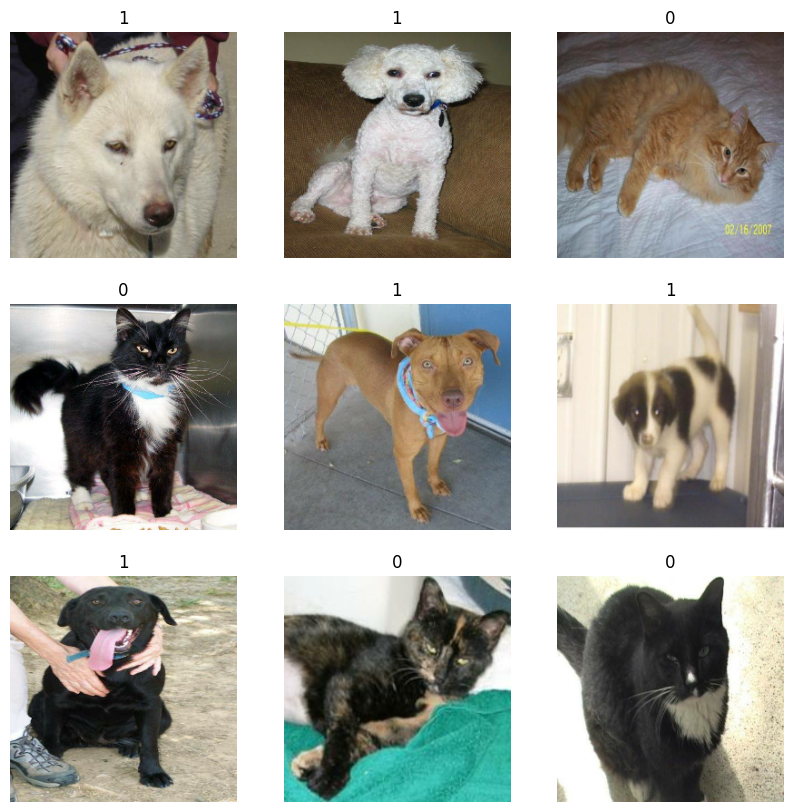

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    
    plt.imshow(image.numpy().reshape(250, 250, 3)/255)
    plt.title(int(label))
    plt.axis("off")

In [16]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [17]:
train_ds =train_ds.unbatch()
test_ds =test_ds.unbatch()
validation_ds =validation_ds.unbatch()

In [18]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [19]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow import keras
from tensorflow.keras import layers


In [21]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

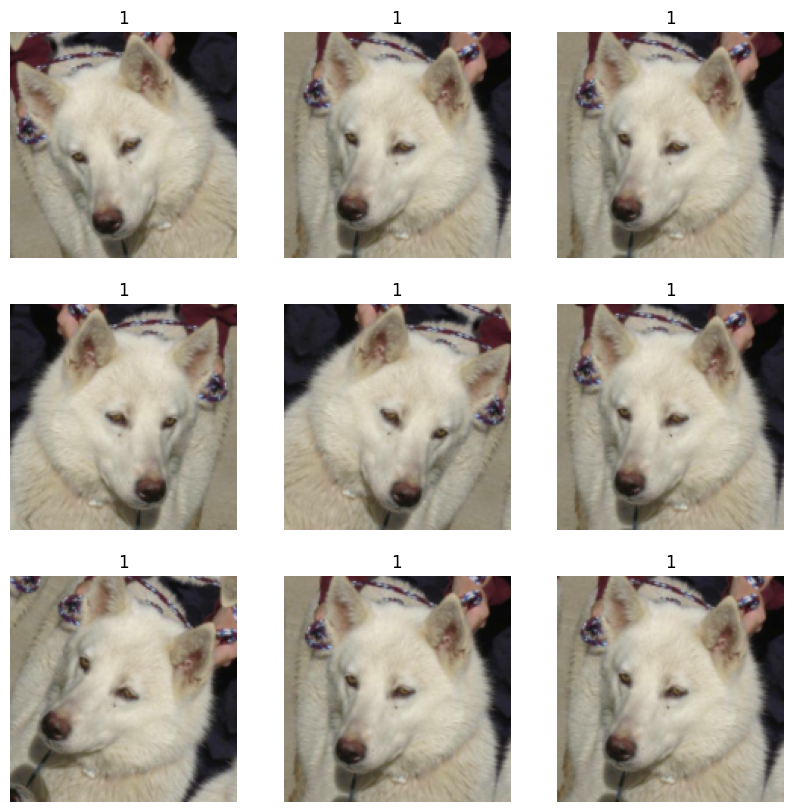

In [22]:
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [23]:
base_model= keras.applications.Xception(
    weights='imagenet',
    input_shape =(150,150,3),
    include_top=False,
)

83683744/83683744 [==============================] - 0s 0us/step


In [24]:
base_model.trainable=False

In [25]:
inputs= keras.Input(shape=(150,150,3))

In [26]:
x = data_augmentation(inputs)

In [27]:
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

In [28]:
x = base_model(x, training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                             

In [29]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [30]:
epochs=1
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

63/63 [==============================] - 189s 3s/step - loss: 0.2662 - binary_accuracy: 0.8695 - val_loss: 0.1014 - val_binary_accuracy: 0.9630


In [32]:
for i,l in train_ds.take(22):
  test= i

In [33]:
model.predict(test.numpy()[0].reshape(1,150, 150, 3))

1/1 [==============================] - 1s 1s/step


array([[-4.7001295]], dtype=float32)

In [34]:
predict= model.predict(test.numpy()[0].reshape(1,150, 150, 3))

1/1 [==============================] - 0s 36ms/step


In [35]:
 np.argmax(predict , axis=1)

array([0])

In [36]:
1/(1 + np.exp(-predict[0][0]))

0.00901214210680549

In [37]:
predict[0][0]

-4.7001295

In [38]:
predict.max()

-4.7001295

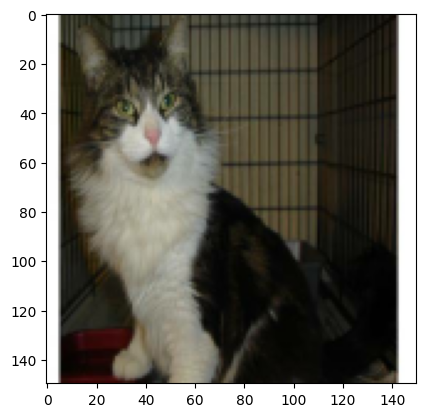

In [39]:
plt.imshow(test.numpy()[0].reshape(150, 150, 3)/255)

In [70]:
test.numpy()[0].reshape(1,150, 150, 3).shape

(1, 150, 150, 3)

In [41]:
model2= model

<h2> Fine tune the model </h2>


In [65]:
# Unfreeze the base model
model2.trainable = True

In [43]:
model2.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [44]:
model2.fit(test_ds, epochs=2)

Epoch 1/2
32/32 [==============================] - 94s 2s/step - loss: 0.1429 - binary_accuracy: 0.9400
Epoch 2/2
32/32 [==============================] - 7s 231ms/step - loss: 0.0960 - binary_accuracy: 0.9660


In [45]:
model2

In [61]:
for i,l in validation_ds.take(3):
  test= i

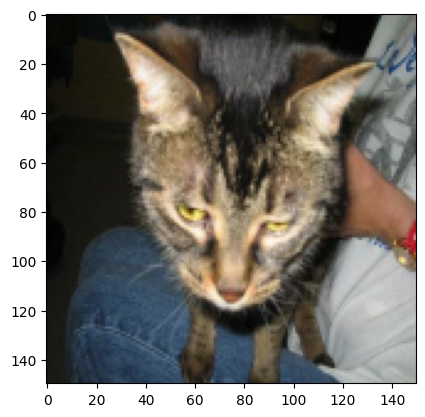

In [62]:
plt.imshow(test.numpy()[0].reshape(150, 150, 3)/255)

In [63]:
predict= model2.predict(test.numpy()[0].reshape(1,150, 150, 3))

1/1 [==============================] - 0s 24ms/step


In [64]:
1/(1 + np.exp(-predict[0][0]))

0.0019903566588175296